In [1]:
import matplotlib.pyplot as plt
plt.rcParams['axes.facecolor'] = 'black'
import numpy as np

In [2]:
#setting constants and initial conditions

ms = 419709.02 #mass of spacecraft
me = 5.972*(10**24) #mass of earth
G = 6.67*(10**(-11))
re = 6378*1000 #radius of earth
R = re + (409*1000) #orbital radius
rs = [R,0] #initial position of spacecraft
w = (G*(ms + me)/(R**3))**.5
v_mag = w*R
v = v_mag*np.array([0,1])
y = np.concatenate((rs,v))

#solar radiation conditions
r_factor = .5 #reflection factor
A = 2500 #cross-sectional area of spacecraft exposed to the sun

#drag conditions
p = 5*(10**(-12)) #density of air at 400 km altitude
C_d = 3 #drag coefficient
A_drag = 3000 #reference area

#thrust conditions
q = 15 #rate of ejected mass flow
Ve = 3100 #exhaust gas ejection speed
Pe = 5000 #pressure of exhaust gases at nozzle exit
Pa = 0 #atmospheric pressure
Ae = .7 #area of nozzle exit

#sun and moon conditions
R_sun = 1.496*10**11
R_moon = 384402*10**3
msun = 1.98847*10**30
mm = 7.347*10**22
w_sun = 2*np.pi/(3.2*10**7)
w_moon = 2*np.pi/(27.32*24*60*60)

In [3]:
#defining update function
def Kepler_with_perturbations(t,y,rad,drag,thrust,sun,moon):
    global ms, me, G
    drdt = y[2:4]
    r = y[0:2]
    rsun = R_sun*np.array([np.cos(np.pi - (w_sun*t)),np.sin(np.pi - (w_sun*t))])
    rmoon = R_moon*np.array([np.cos(w_moon*t),np.sin(w_moon*t)])
    
    if rad:
        a_solar_radiation = -4.5*10**(-6)*(1+r_factor)*A/ms
    else:
        a_solar_radiation = 0
    if drag:
        F_drag = -.5*p*(drdt**2)*C_d*A_drag
    else:
        F_drag = 0
    if thrust:
        F_thrust = -(q*Ve + (Pe - Pa)*Ae)
    else:
        F_thrust = 0
    if sun:
        F_sun = (-G*ms*msun*(r-rsun))/(((r[0]-rsun[0])**2 + (r[1]-rsun[1])**2)**(3/2))
    else:
        F_sun = 0
    if moon:
        F_moon = (-G*ms*mm*(r-rmoon))/(((r[0]-rmoon[0])**2 + (r[1]-rmoon[1])**2)**(3/2))
    else:
        F_moon = 0
        
    F = (-G*ms*me*r/((r[0]**2 + r[1]**2)**(3/2)))+F_drag+F_thrust+F_sun+F_moon
    a = (F/ms) + a_solar_radiation
    dvdt = a
    return np.concatenate((drdt,dvdt))

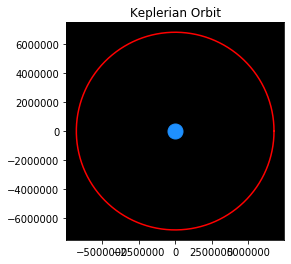

In [4]:
#Runge-Kutta

T = (4*((np.pi)**2)*R**3/(G*(ms+me)))**.5
dt = T/1000
t = 0

rs_x = []
rs_y = []

rad = True
drag = True
thrust = False
sun = True
moon = True

while (t<(T)):
    
    rs_x = np.append(rs_x, y[0])
    rs_y = np.append(rs_y, y[1])
    
    f1 = Kepler_with_perturbations(t,y,rad,drag,thrust,sun,moon)
    f2 = Kepler_with_perturbations(t+dt/2.0,y+f1*dt/2.0,rad,drag,thrust,sun,moon)
    f3 = Kepler_with_perturbations(t+dt/2.0,y+f2*dt/2.0,rad,drag,thrust,sun,moon)
    f4 = Kepler_with_perturbations(t+dt,y+f3*dt,rad,drag,thrust,sun,moon)

    y = y + (f1 + 2.0*f2 + 2.0*f3 + f4) / 6.0 * dt
    t = t + dt
    
plt.plot(rs_x,rs_y,'r-')
plt.plot(0,0,'.',color='dodgerblue',ms=30)
plt.title('Keplerian Orbit')
plt.gca().set_aspect('equal', adjustable='box')
plt.show()